<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/figures_desam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown
url = 'https://drive.google.com/uc?id=1u0giFt5rQ-zJy1aLIM9U0UADUf96El3a'
gdown.download(url,'pred_figs_18.zip',quiet=True)
!unzip -q pred_figs_18.zip -d pred_figs_18

In [2]:
import gdown

url = 'https://drive.google.com/uc?id=1GywnVOXU9P_h5u5-XDlNrjbBiIcUi-4D'
gdown.download(url,'pred_figs_17.zip',quiet=True)
!unzip -q pred_figs_17.zip pred_figs_17

caution: filename not matched:  pred_figs_17


array([0, 1, 4, 6], dtype=uint8)

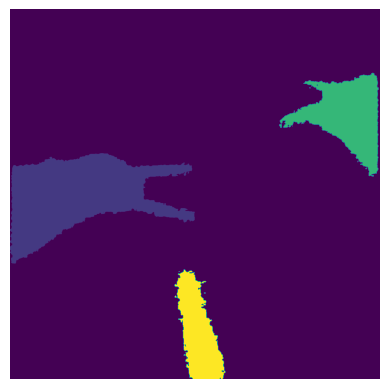

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2


mask = cv2.imread('pred_figs_18/pred_seq5_frame029.png', 0)

plt.figure()
plt.axis('off')
plt.imshow(mask)
np.unique(mask)

array([0, 1, 4, 6], dtype=uint8)

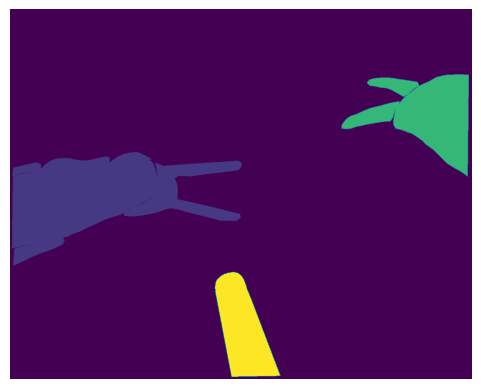

In [6]:
mask = cv2.imread('pred_figs_18/seq_5_frame029.png', 0)

plt.figure()
plt.axis('off')
plt.imshow(mask)
np.unique(mask)

array([0, 4, 6], dtype=uint8)

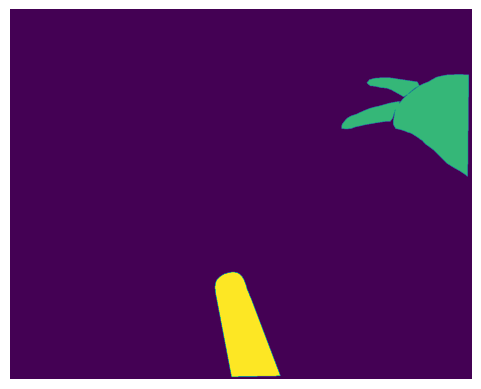

In [10]:
mask = cv2.imread('pred_figs_18/seq_5_frame029.png', 0)
mask[mask==1] = 0
plt.figure()
plt.axis('off')
plt.imshow(mask)
np.unique(mask)

[0 1 4 6]


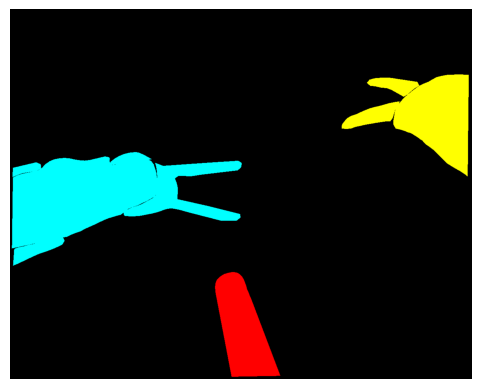

In [16]:
colors = [(0, 0, 0),   # Background (black)
          (0, 154, 218), # Class 1 (magenta)#[ 73, 154, 218]
          (0, 255, 0), # Class 2 (green)
          (0, 0, 255), # Class 3 (blue)
          (255, 255, 0), # Class 4 (yellow)
          (255, 0, 255), # Class 5 (magenta)
          (255, 0, 0), # Class 6 (red)
          (128, 128, 128)] # Class 7 (gray)

mask = cv2.imread('pred_figs_18/seq_5_frame029.png', 0)

classes = np.unique(mask)
r_mask = np.zeros((mask.shape[0], mask.shape[1]))
g_mask = np.zeros((mask.shape[0], mask.shape[1]))
b_mask = np.zeros((mask.shape[0], mask.shape[1]))

print(classes)
for i, cls in enumerate(classes):
    if cls == 0:
        continue
    r_mask[mask==cls] = colors[cls][0];
    g_mask[mask==cls] = colors[cls][1];
    b_mask[mask==cls] = colors[cls][2]

plt.figure()
plt.axis('off')
plt.imshow(np.array([r_mask,g_mask,b_mask]).transpose(1,2,0))

In [13]:
mask = cv2.imread('rgb.png')
np.unique(mask)

array([ 73, 154, 218], dtype=uint8)